Кириленко Ульяна Олеговна ИУ9-71Б

Задачи для контрольной работы по нейронным сетям:

Требования:
- Используем для сдачи задания *.ipynb с сохранением выводов или *.pdf версию с графиками и кодом: google colaboratory, jupyter — рабочей(доступной — актуальной ссылкой на google colaboratory или git - не рабочая ссылка (не публичная) — оценивается как «0 баллов»)
- Используем только numpy для решения задачи и для генерации данных sklearn.
- Результаты в графиках и выводах

**срок сдачи: 7.11 - 23-59**  

номер задачи для решения = Номер по журналу % 5 + 1


In [5]:
print(f"Вариант: {9%5+1}")

Вариант: 5


**Задача 5: Многослойный перцептрон с ручным вычислением градиентов** 
1. Реализовать двухслойную сеть с обратным распространением:
2. Ручной расчет всех частных производных для весов скрытого и выходного слоев
3. Проверка сходимости для задачи регресии в серии из 10 повторных запусках(sklearn.datasets.make_regression — n_features=50, n_informative=1 + <день рождения>/2, noise=0.5 * <день рождения>) при трех разных n_samples= 1000 (100, 10000).  
4. (*) показать vanishing gradient problem для глубоких сетей


<img src="https://media.lpgenerator.ru/uploads/2022/12/12/6.png" width="900" height="700">

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  MinMaxScaler
import datetime

birth_day = 2
n_informative = 1 + birth_day // 2
noise = 0.5 * birth_day

## Многослойный перцептрон с ручным вычислением градиентов

In [7]:
class MLP:
    def __init__(self, layer_sizes, learning_rate=0.01):
        self.layer_sizes = layer_sizes
        self.learning_rate = learning_rate
        self.weights = []
        self.biases = []
        
        for i in range(len(layer_sizes) - 1):
            self.weights.append(np.random.randn(layer_sizes[i], layer_sizes[i+1]) * 0.1)
            self.biases.append(np.zeros((1, layer_sizes[i+1])))
        
        self.gradients_history = []
    
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def sigmoid_derivative(self, x):
        return x * (1 - x)
    
    def forward(self, X):
        # Входной слой
        self.layer_outputs = [X]
        self.layer_sums = []

        # "Заход" в первый скрытый слой
        current_layer_output = X
        for i in range(len(self.weights)):
            current_layer_sum = np.dot(current_layer_output, self.weights[i]) + self.biases[i]
            self.layer_sums.append(current_layer_sum)
            
            # Скрытые слои
            if i < len(self.weights) - 1:
                current_layer_output = self.sigmoid(current_layer_sum)
            # Выходной слой
            else:
                current_layer_output = current_layer_sum
                
            self.layer_outputs.append(current_layer_output)
        
        return current_layer_output
    
    def backward(self, X, y_true, y_pred):
        gradients = []
        
        # Градиент потери относительно выхода (производная MSE)
        dL_dy_pred = 2 * (y_pred - y_true) / X.shape[0]
        
        delta = dL_dy_pred
        
        for i in reversed(range(len(self.weights))):
            # Градиенты для текущего слоя
            dL_dW = np.dot(self.layer_outputs[i].T, delta)
            dL_db = np.sum(delta, axis=0, keepdims=True)

            # Считаем и сохраняем норму
            grad_w_norm = np.sqrt(np.sum(dL_dW ** 2))
            grad_b_norm = np.sqrt(np.sum(dL_db ** 2))
            gradients.insert(0, {'W': grad_w_norm, 'b': grad_b_norm})

            # Обновляем веса
            self.weights[i] -= self.learning_rate * dL_dW
            self.biases[i] -= self.learning_rate * dL_db
            
            if i > 0:  # Считаем градиенты до входного слоя (не включительно)
                delta = np.dot(delta, self.weights[i].T) * self.sigmoid_derivative(self.layer_outputs[i])

        self.gradients_history.append(gradients)
        
        return np.mean((y_pred - y_true)**2)
    
    def train(self, X, y, epochs=1000):
        losses = []
        for epoch in range(epochs):
            output = self.forward(X)
            loss = self.backward(X, y, output)
            losses.append(loss)
        return losses

## Проверка сходимости для задачи регресии в серии из 10 повторных запусках  
(sklearn.datasets.make_regression — n_features=50, n_informative=1 + <день рождения>/2, noise=0.5 * <день рождения>)   
при **n_samples= 100**

In [8]:
all_losses_100 = []
all_gradients_100 = []

for r in range(10):
    print(f"Запуск {r + 1}")

    # Генерация данных
    X, y = make_regression(
        n_samples=100,
        n_features=50,
        n_informative=n_informative,
        noise=noise,
        random_state=r
    )
    
    # Нормализация и разделение
    x_scaler = MinMaxScaler()
    y_scaler = MinMaxScaler()
    X = x_scaler.fit_transform(X)
    y = y_scaler.fit_transform(y.reshape(-1, 1))

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=r)

    # Создание и обучение модели
    model = MLP(layer_sizes=[50, 20, 1], learning_rate=0.001)
    losses = model.train(X_train, y_train, epochs=500)
    
    # Предсказание и оценка
    y_pred = model.forward(X_test)
    test_mse = np.mean((y_pred - y_test)**2)
    
    all_losses_100.append(losses)
    all_gradients_100.append(model.gradients_history)
    
    print(f"  Final Loss: {losses[-1]:.5f}")

Запуск 1
  Final Loss: 0.03312
Запуск 2
  Final Loss: 0.03833
Запуск 3
  Final Loss: 0.02908
Запуск 4
  Final Loss: 0.05432
Запуск 5
  Final Loss: 0.03416
Запуск 6
  Final Loss: 0.05714
Запуск 7
  Final Loss: 0.04238
Запуск 8
  Final Loss: 0.04959
Запуск 9
  Final Loss: 0.04155
Запуск 10
  Final Loss: 0.02524


Средний финальный Loss: 0.04049
Стандартное отклонение: 0.01009
Минимальный Loss: 0.02524
Максимальный Loss: 0.05714
Медиана: 0.03994


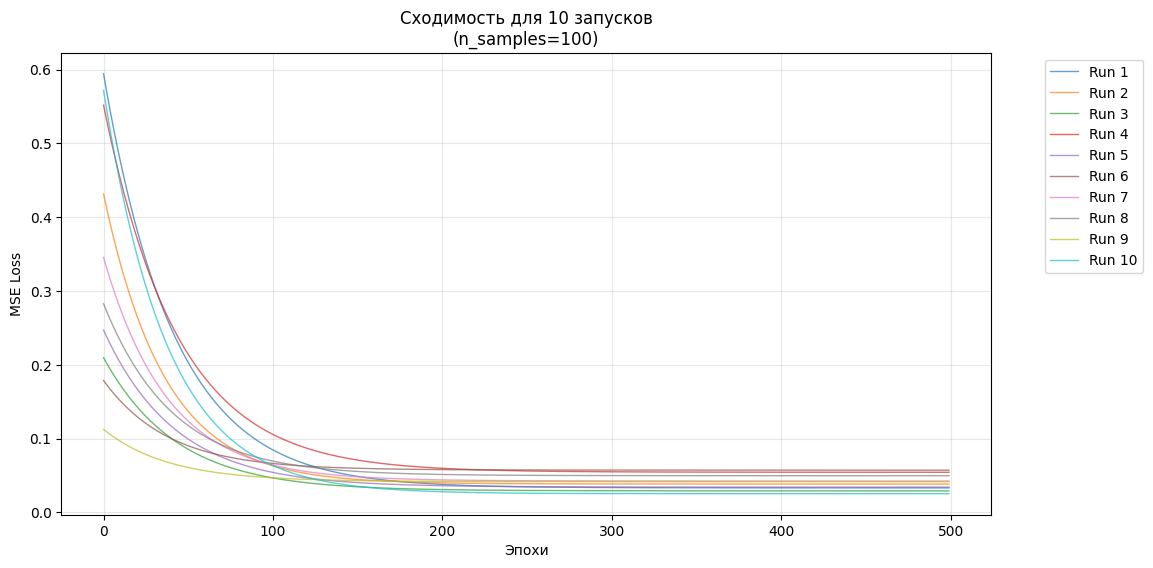

In [9]:
plt.figure(figsize=(12, 6))
for i, losses in enumerate(all_losses_100):
    plt.plot(losses, alpha=0.7, linewidth=1, label=f'Run {i+1}')
plt.xlabel('Эпохи')
plt.ylabel('MSE Loss')
plt.title('Сходимость для 10 запусков\n(n_samples=100)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)


final_losses = [losses[-1] for losses in all_losses_100]
final_losses_array = np.array(final_losses)
print(f"Средний финальный Loss: {np.mean(final_losses_array):.5f}")
print(f"Стандартное отклонение: {np.std(final_losses_array):.5f}")
print(f"Минимальный Loss: {np.min(final_losses_array):.5f}")
print(f"Максимальный Loss: {np.max(final_losses_array):.5f}")
print(f"Медиана: {np.median(final_losses_array):.5f}")

## Проверка сходимости для задачи регресии в серии из 10 повторных запусках  
(sklearn.datasets.make_regression — n_features=50, n_informative=1 + <день рождения>/2, noise=0.5 * <день рождения>)   
при **n_samples= 1000**

In [10]:
all_losses_1000 = []
all_gradients_1000 = []

for r in range(10):
    print(f"Запуск {r + 1}")

    # Генерация данных
    X, y = make_regression(
        n_samples=1000,
        n_features=50,
        n_informative=n_informative,
        noise=noise,
        random_state=r
    )
    
    # Нормализация и разделение
    x_scaler = MinMaxScaler()
    y_scaler = MinMaxScaler()
    X = x_scaler.fit_transform(X)
    y = y_scaler.fit_transform(y.reshape(-1, 1))

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=r)

    # Создание и обучение модели
    model = MLP(layer_sizes=[50, 20, 1], learning_rate=0.001)
    losses = model.train(X_train, y_train, epochs=500)
    
    # Предсказание и оценка
    y_pred = model.forward(X_test)
    test_mse = np.mean((y_pred - y_test)**2)
    
    all_losses_1000.append(losses)
    all_gradients_1000.append(model.gradients_history)
    
    print(f"  Final Loss: {losses[-1]:.5f}")

Запуск 1
  Final Loss: 0.02470
Запуск 2
  Final Loss: 0.02287
Запуск 3
  Final Loss: 0.01833
Запуск 4
  Final Loss: 0.02679
Запуск 5
  Final Loss: 0.01876
Запуск 6
  Final Loss: 0.02394
Запуск 7
  Final Loss: 0.02646
Запуск 8
  Final Loss: 0.01967
Запуск 9
  Final Loss: 0.02735
Запуск 10
  Final Loss: 0.02257


Средний финальный Loss: 0.02314
Стандартное отклонение: 0.00316
Минимальный Loss: 0.01833
Максимальный Loss: 0.02735
Медиана: 0.02340


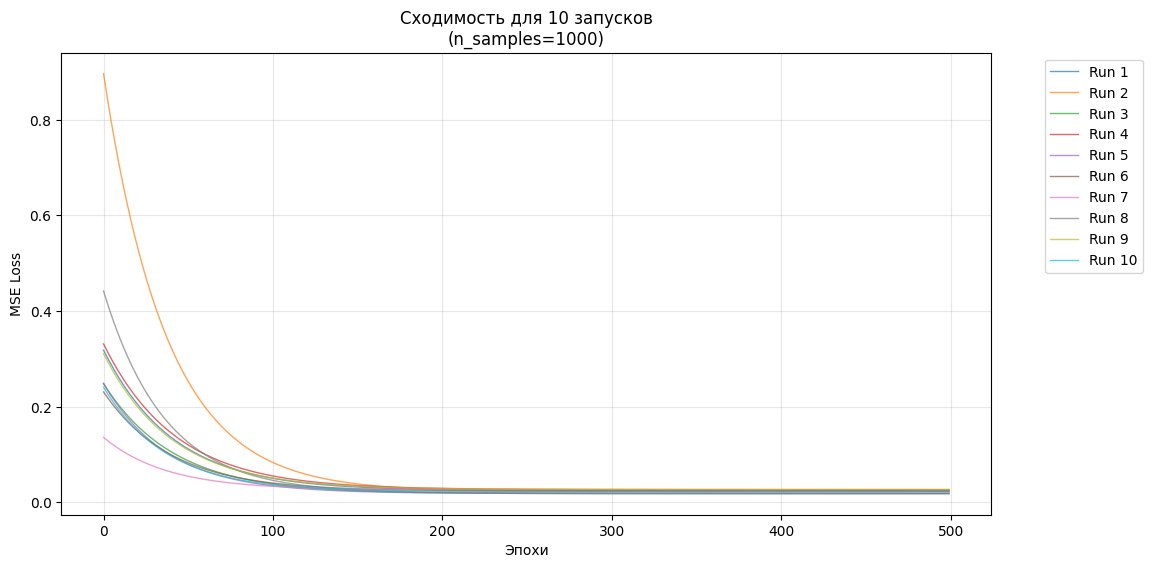

In [11]:
plt.figure(figsize=(12, 6))
for i, losses in enumerate(all_losses_1000):
    plt.plot(losses, alpha=0.7, linewidth=1, label=f'Run {i+1}')
plt.xlabel('Эпохи')
plt.ylabel('MSE Loss')
plt.title('Сходимость для 10 запусков\n(n_samples=1000)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)


final_losses = [losses[-1] for losses in all_losses_1000]
final_losses_array = np.array(final_losses)
print(f"Средний финальный Loss: {np.mean(final_losses_array):.5f}")
print(f"Стандартное отклонение: {np.std(final_losses_array):.5f}")
print(f"Минимальный Loss: {np.min(final_losses_array):.5f}")
print(f"Максимальный Loss: {np.max(final_losses_array):.5f}")
print(f"Медиана: {np.median(final_losses_array):.5f}")

## Проверка сходимости для задачи регресии в серии из 10 повторных запусках  
(sklearn.datasets.make_regression — n_features=50, n_informative=1 + <день рождения>/2, noise=0.5 * <день рождения>)   
при **n_samples= 10000**

In [12]:
all_losses_10000 = []
all_gradients_10000 = []

for t in range(10):
    print(f"Запуск {t + 1}")

    # Генерация данных
    X, y = make_regression(
        n_samples=10000,
        n_features=50,
        n_informative=n_informative,
        noise=noise,
        random_state=t
    )
    
    # Нормализация и разделение
    x_scaler = MinMaxScaler()
    y_scaler = MinMaxScaler()
    X = x_scaler.fit_transform(X)
    y = y_scaler.fit_transform(y.reshape(-1, 1))

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=r)
    
    # Создание и обучение модели
    model = MLP(layer_sizes=[50, 20, 1], learning_rate=0.001)
    losses = model.train(X_train, y_train, epochs=500)
    
    # Предсказание и оценка
    y_pred = model.forward(X_test)
    test_mse = np.mean((y_pred - y_test)**2)
    
    all_losses_10000.append(losses)
    all_gradients_10000.append(model.gradients_history)
    
    print(f"  Final Loss: {losses[-1]:.5f}")

Запуск 1
  Final Loss: 0.01614
Запуск 2
  Final Loss: 0.01291
Запуск 3
  Final Loss: 0.01578
Запуск 4
  Final Loss: 0.01997
Запуск 5
  Final Loss: 0.01720
Запуск 6
  Final Loss: 0.02133
Запуск 7
  Final Loss: 0.01775
Запуск 8
  Final Loss: 0.01557
Запуск 9
  Final Loss: 0.02073
Запуск 10
  Final Loss: 0.01844


Средний финальный Loss: 0.01758
Стандартное отклонение: 0.00249
Минимальный Loss: 0.01291
Максимальный Loss: 0.02133
Медиана: 0.01748


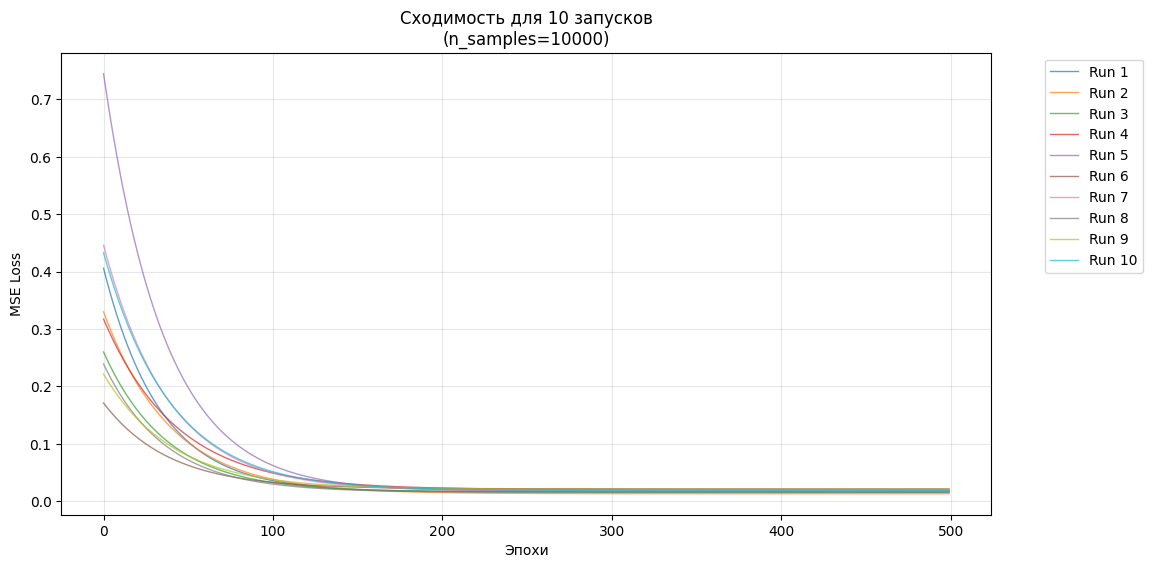

In [13]:
plt.figure(figsize=(12, 6))
for i, losses in enumerate(all_losses_10000):
    plt.plot(losses, alpha=0.7, linewidth=1, label=f'Run {i+1}')
plt.xlabel('Эпохи')
plt.ylabel('MSE Loss')
plt.title('Сходимость для 10 запусков\n(n_samples=10000)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)


final_losses = [losses[-1] for losses in all_losses_10000]
final_losses_array = np.array(final_losses)
print(f"Средний финальный Loss: {np.mean(final_losses_array):.5f}")
print(f"Стандартное отклонение: {np.std(final_losses_array):.5f}")
print(f"Минимальный Loss: {np.min(final_losses_array):.5f}")
print(f"Максимальный Loss: {np.max(final_losses_array):.5f}")
print(f"Медиана: {np.median(final_losses_array):.5f}")

## Вывод
Увеличение объема данных улучшает **качество** (уменьшается средний финальный Loss) и **стабильность** (уменьшается стандартное отклонение) модели.

## Vanishing gradient problem для глубоких сетей

In [14]:
all_gradients_1000_8_layers = []
all_losses_1000_8_layers = []

for r in range(10):
    print(f"Запуск {r + 1}")
    
    # Генерация данных
    X, y = make_regression(
        n_samples=1000,
        n_features=50,
        n_informative=n_informative,
        noise=noise,
        random_state=r
    )
    
    # Нормализация и разделение
    x_scaler = MinMaxScaler()
    y_scaler = MinMaxScaler()
    X = x_scaler.fit_transform(X)
    y = y_scaler.fit_transform(y.reshape(-1, 1))

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=r)

    model = MLP(layer_sizes=[50, 20, 15, 12, 10, 8, 6, 4, 1], learning_rate=0.001)
    losses = model.train(X_train, y_train, epochs=500)
    
    all_losses_1000_8_layers.append(losses)
    all_gradients_1000_8_layers.append(model.gradients_history)
    
    print(f"  Final Loss: {losses[-1]:.5f}")

Запуск 1
  Final Loss: 0.03113
Запуск 2
  Final Loss: 0.02653
Запуск 3
  Final Loss: 0.02062
Запуск 4
  Final Loss: 0.02987
Запуск 5
  Final Loss: 0.02401
Запуск 6
  Final Loss: 0.03013
Запуск 7
  Final Loss: 0.03018
Запуск 8
  Final Loss: 0.02461
Запуск 9
  Final Loss: 0.03392
Запуск 10
  Final Loss: 0.03316


Средний финальный Loss: 0.02842
Стандартное отклонение: 0.00408
Минимальный Loss: 0.02062
Максимальный Loss: 0.03392
Медиана: 0.03000


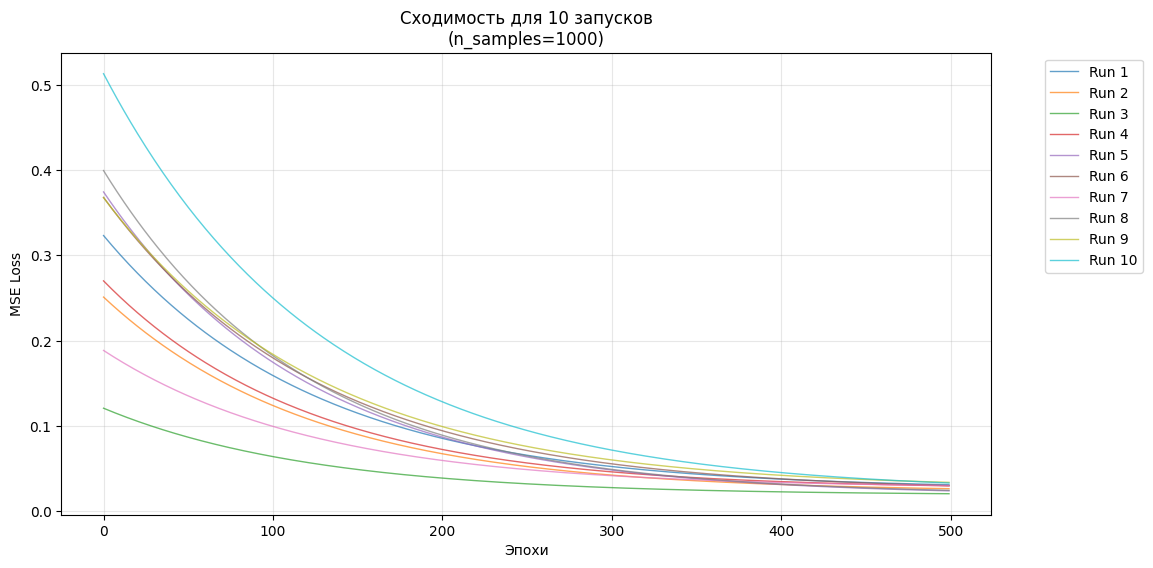

In [15]:
plt.figure(figsize=(12, 6))
for i, losses in enumerate(all_losses_1000_8_layers):
    plt.plot(losses, alpha=0.7, linewidth=1, label=f'Run {i+1}')
plt.xlabel('Эпохи')
plt.ylabel('MSE Loss')
plt.title('Сходимость для 10 запусков\n(n_samples=1000)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)


final_losses = [losses[-1] for losses in all_losses_1000_8_layers]
final_losses_array = np.array(final_losses)
print(f"Средний финальный Loss: {np.mean(final_losses_array):.5f}")
print(f"Стандартное отклонение: {np.std(final_losses_array):.5f}")
print(f"Минимальный Loss: {np.min(final_losses_array):.5f}")
print(f"Максимальный Loss: {np.max(final_losses_array):.5f}")
print(f"Медиана: {np.median(final_losses_array):.5f}")

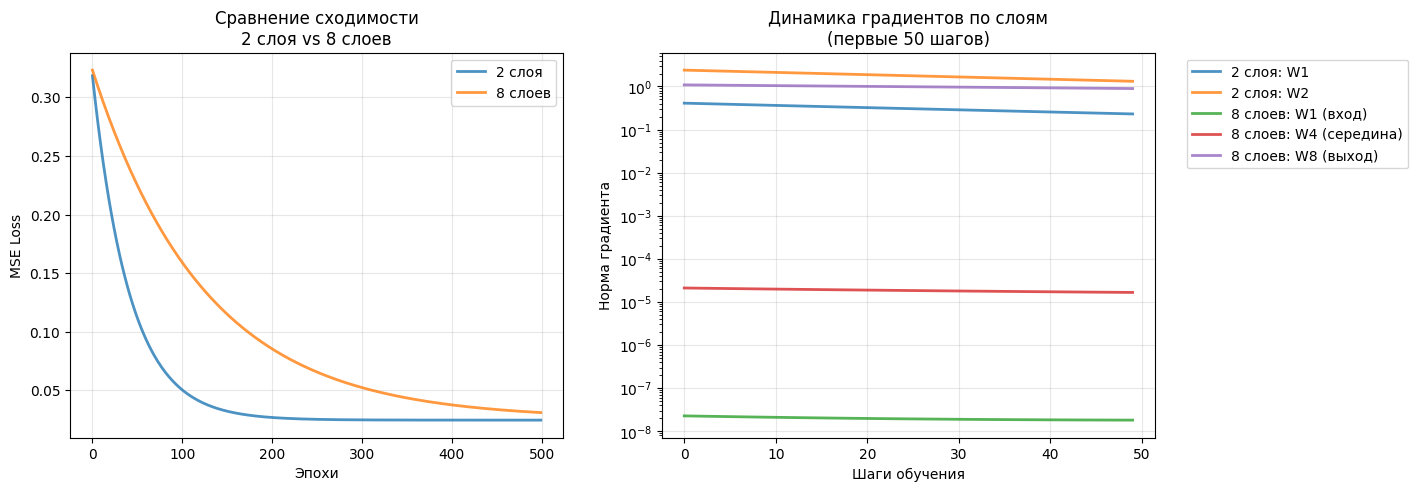

In [16]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
if all_losses_1000 and all_losses_1000_8_layers:
    plt.plot(all_losses_1000[0], label='2 слоя', linewidth=2, alpha=0.8)
    plt.plot(all_losses_1000_8_layers[0], label='8 слоев', linewidth=2, alpha=0.8)
    plt.xlabel('Эпохи')
    plt.ylabel('MSE Loss')
    plt.title('Сравнение сходимости\n2 слоя vs 8 слоев')
    plt.legend()
    plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
if all_gradients_1000 and all_gradients_1000_8_layers:
    gradients_2l = all_gradients_1000[0]
    if gradients_2l:
        grad_2l_W1 = [grad[0]['W'] for grad in gradients_2l[:50]]
        grad_2l_W2 = [grad[1]['W'] for grad in gradients_2l[:50]]
        
        plt.plot(grad_2l_W1, label='2 слоя: W1', linewidth=2, alpha=0.8)
        plt.plot(grad_2l_W2, label='2 слоя: W2', linewidth=2, alpha=0.8)
    
    gradients_8l = all_gradients_1000_8_layers[0]
    if gradients_8l:
        grad_8l_W1 = [grad[0]['W'] for grad in gradients_8l[:50]]
        grad_8l_W4 = [grad[3]['W'] for grad in gradients_8l[:50]] 
        grad_8l_W8 = [grad[7]['W'] for grad in gradients_8l[:50]]
        
        plt.plot(grad_8l_W1, label='8 слоев: W1 (вход)', linewidth=2, alpha=0.8)
        plt.plot(grad_8l_W4, label='8 слоев: W4 (середина)', linewidth=2, alpha=0.8)
        plt.plot(grad_8l_W8, label='8 слоев: W8 (выход)', linewidth=2, alpha=0.8)
    
    plt.xlabel('Шаги обучения')
    plt.ylabel('Норма градиента')
    plt.title('Динамика градиентов по слоям\n(первые 50 шагов)')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, alpha=0.3)
    plt.yscale('log') # иначе вход совсем не видно

## Вывод
Сеть с 2мя слоями показывает лучшее **качество** (меньше средний финальный Loss) и **стабильность** (меньше стандартное отклонение), чем сеть с 8ю слоями. Также видно, что 2-слойная сеть сходится быстрее.   
8-слойная сеть демонстрирует проблему исчезающих градиентов (градиенты на слоях W1, W4 маленькие).